In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing all the datasets
import pandas as pd
from datetime import datetime

# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/olist_customers_dataset.csv")
geolocation = pd.read_csv("/content/drive/MyDrive/olist_geolocation_dataset.csv")
order_items = pd.read_csv("/content/drive/MyDrive/olist_order_items_dataset.csv")
order_payments = pd.read_csv("/content/drive/MyDrive/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("/content/drive/MyDrive/olist_order_reviews_dataset.csv")
orders = pd.read_csv("/content/drive/MyDrive/olist_orders_dataset.csv")
products = pd.read_csv("/content/drive/MyDrive/olist_products_dataset.csv")
sellers = pd.read_csv("/content/drive/MyDrive/olist_sellers_dataset.csv")
category_translation = pd.read_csv("/content/drive/MyDrive/product_category_name_translation.csv")
print("All datasets loaded successfully")

All datasets loaded successfully


In [3]:
#Examine the structure of each table

print(customers.describe())
print(geolocation.describe())
print(order_items.describe())
print(order_payments.describe())
print(order_reviews.describe())
print(orders.describe())
print(products.describe())
print(sellers.describe())
print(category_translation.describe())


       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112

In [4]:
#  Identify missing values in each column
print(customers.isnull().sum())
print(geolocation.isnull().sum())
print(order_items.isnull().sum())
print(order_payments.isnull().sum())
print(order_reviews.isnull().sum())
print(orders.isnull().sum())
print(products.isnull().sum())
print(sellers.isnull().sum())
print(category_translation.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                         0
customer_id                      0
order_status  

In [5]:
# Checkfor duplicate entries
print(customers.duplicated().sum())
print(geolocation.duplicated().sum())
print(order_items.duplicated().sum())
print(order_payments.duplicated().sum())
print(order_reviews.duplicated().sum())
print(orders.duplicated().sum())
print(products.duplicated().sum())
print(sellers.duplicated().sum())
print(category_translation.duplicated().sum())

0
261831
0
0
0
0
0
0
0


In [6]:
#  Verify data types of each column
print(customers.dtypes)
print(geolocation.dtypes)
print(order_items.dtypes)
print(order_payments.dtypes)
print(order_reviews.dtypes)
print(orders.dtypes)
print(products.dtypes)
print(sellers.dtypes)
print(category_translation.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       

In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = order_payments['payment_value'].quantile(0.25)
Q3 = order_payments['payment_value'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_payments = order_payments[(order_payments['payment_value'] >= lower_bound) & (order_payments['payment_value'] <= upper_bound)]

print(filtered_payments)

                                order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103879  c45067032fd84f4cf408730ff5205568                   1  credit_card   
103880  7159096c5aa9be77f7f0c26c01ee9793                   1  credit_card   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8 

In [8]:
# remove review title and comment
reviews=order_reviews.drop(['review_comment_title','review_comment_message'],axis=1)
print(reviews.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_creation_date review_answer_timestamp  
0             4  2018-01-18 00:00:00     2018-01-18 21:46:59  
1             5  2018-03-10 00:00:00     2018-03-11 03:05:13  
2             5  2018-02-17 00:00:00     2018-02-18 14:36:24  
3             5  2017-04-21 00:00:00     2017-04-21 22:02:06  
4             5  2018-03-01 00:00:00     2018-03-02 10:26:53  


In [9]:
# merging with orders and order_items
orders_orderitems=pd.merge(order_items,orders,on='order_id',how='left')

# merge with orders_order_items with customers
cust_orders_orderitems=pd.merge(customers,orders_orderitems,on='customer_id',how='left')

# merge product with cust_orders_orderitems
product_data=pd.merge(cust_orders_orderitems,products,on='product_id',how='left')

# merge with cust_orders_orderitems with filtered payments
payments_data=pd.merge(product_data,filtered_payments,on='order_id',how='left')

# merge review with payments data
reviews_data=pd.merge(payments_data,reviews,on='order_id',how='left')

# merge sellers with payments data
sales_data=pd.merge(reviews_data,sellers,on='seller_id',how='left')

print(sales_data.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id  order_item_id  \
0  00e7ee1b050b8499577073aeb2a297a1            1.0   
1  29150127e6685892b6eab3eec79f59c7   

In [10]:
# Extract temporal features
sales_data['order_purchase_timestamp'] = pd.to_datetime(sales_data['order_purchase_timestamp'])
sales_data['order_date'] = sales_data['order_purchase_timestamp'].dt.day
sales_data['order_week'] = sales_data['order_purchase_timestamp'].dt.isocalendar().week
sales_data['order_month'] = sales_data['order_purchase_timestamp'].dt.month

<ipython-input-10-b9d898d1fb8a>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales_data['order_purchase_timestamp'] = pd.to_datetime(sales_data['order_purchase_timestamp'])


In [11]:
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Aggregate sales by day
daily_sales = sales_data.groupby('order_date')['payment_value'].sum()
print(daily_sales)

order_date
1.0     377332.34
2.0     412319.03
3.0     403880.50
4.0     435425.81
5.0     425763.76
6.0     433297.79
7.0     405114.00
8.0     411794.19
9.0     390277.83
10.0    397357.14
11.0    408379.76
12.0    398317.15
13.0    429986.25
14.0    423628.80
15.0    429403.27
16.0    451682.45
17.0    386976.16
18.0    425237.71
19.0    430299.90
20.0    409424.63
21.0    379699.48
22.0    391123.39
23.0    387741.81
24.0    484537.71
25.0    401785.47
26.0    425819.96
27.0    399891.60
28.0    357785.92
29.0    321352.32
30.0    302498.31
31.0    201558.26
Name: payment_value, dtype: float64


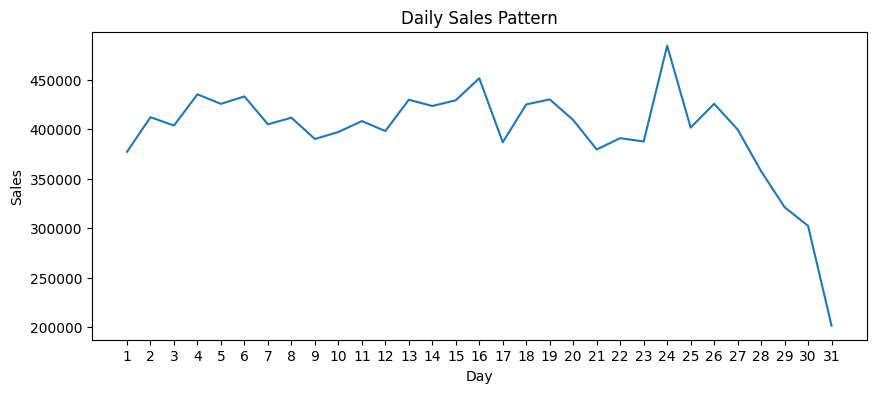

In [12]:
# Plot daily sales pattern
plt.figure(figsize=(10, 4))
# plt.margins(x=0, y=0)
plt.plot(daily_sales.index,daily_sales.values)

# daily_sales.plot()
plt.title("Daily Sales Pattern")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.xticks(daily_sales.index)
plt.show()

In [13]:
# Aggregate sales by week
weekly_sales = sales_data.groupby('order_week')['payment_value'].sum()
print(weekly_sales)

order_week
1     186138.32
2     222298.59
3     240212.11
4     251404.17
5     253962.01
6     263178.31
7     254900.16
8     260883.09
9     302905.55
10    271799.76
11    284046.16
12    296570.55
13    250603.18
14    264807.53
15    252094.00
16    289172.07
17    304193.73
18    331699.85
19    357418.96
20    343351.35
21    211254.09
22    225349.15
23    286501.52
24    287847.51
25    258892.66
26    261951.15
27    240678.77
28    245480.24
29    329880.16
30    317821.76
31    368767.01
32    360845.32
33    340787.12
34    241027.82
35    133930.62
36    107942.29
37    143225.56
38    126260.74
39    114572.46
40    157567.83
41    132123.81
42    153002.04
43    120435.58
44    120554.44
45    144895.16
46    172785.99
47    373933.43
48    269362.20
49    210773.66
50    176528.57
51    118957.53
52    104117.06
Name: payment_value, dtype: float64


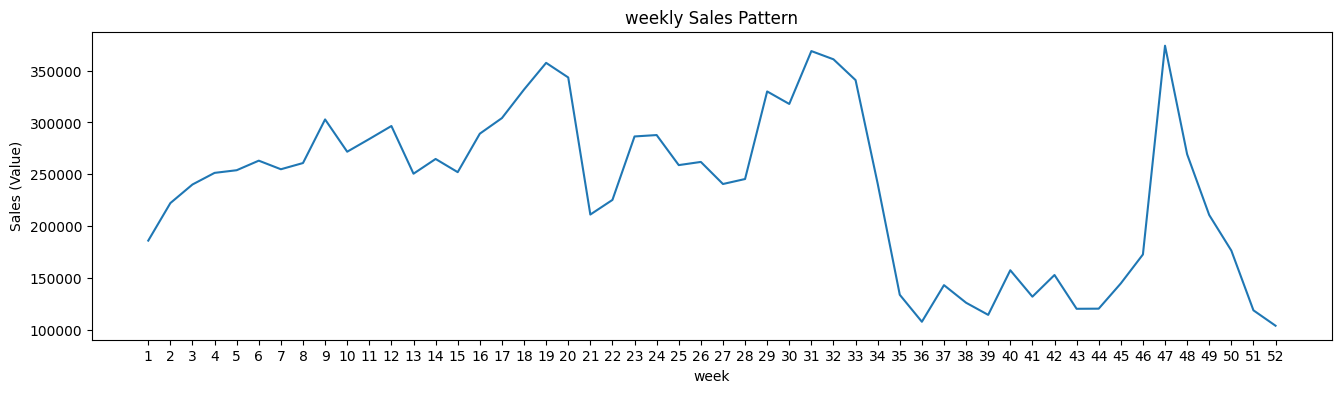

In [14]:
# Plot weekly sales pattern
plt.figure(figsize=(16, 4))
plt.plot(weekly_sales.index,weekly_sales.values)
# daily_sales.plot()
plt.title("weekly Sales Pattern")
plt.xlabel("week")
plt.ylabel("Sales (Value)")
plt.xticks(weekly_sales.index)
plt.show()

In [15]:
import calendar
months=list(calendar.month_name)[1:]
print(months)

# Aggregate sales by Month
monthly_sales = sales_data.groupby('order_month')['payment_value'].sum()
print(monthly_sales)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
order_month
1.0     1008688.25
2.0     1054291.25
3.0     1237182.43
4.0     1180172.65
5.0     1325676.67
6.0     1164443.94
7.0     1266473.19
8.0     1307064.04
9.0      524494.50
10.0     618909.47
11.0     948622.36
12.0     703673.95
Name: payment_value, dtype: float64


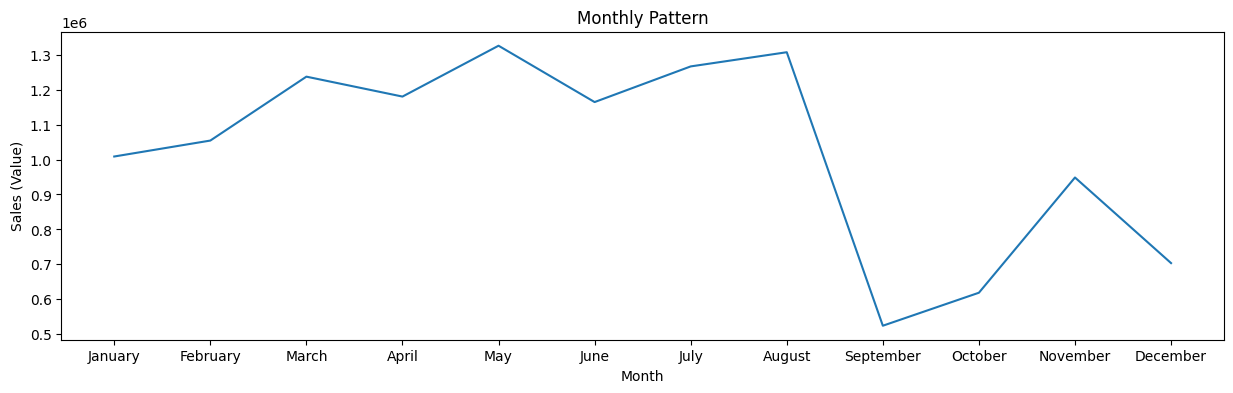

In [16]:
# Plot month sales pattern
plt.figure(figsize=(15, 4))
plt.plot(months,monthly_sales)
# Monthly_sales.plot()
plt.title("Monthly Pattern")
plt.xlabel("Month")
plt.ylabel("Sales (Value)")

plt.show()

In [17]:
# Identify seasonal trends
sales_data['order_quarter'] = sales_data['order_purchase_timestamp'].dt.quarter
# Aggregate sales by quater
quaterly_sales = sales_data.groupby('order_quarter')['payment_value'].sum()
print(quaterly_sales)

order_quarter
1.0    3300161.93
2.0    3670293.26
3.0    3098031.73
4.0    2271205.78
Name: payment_value, dtype: float64


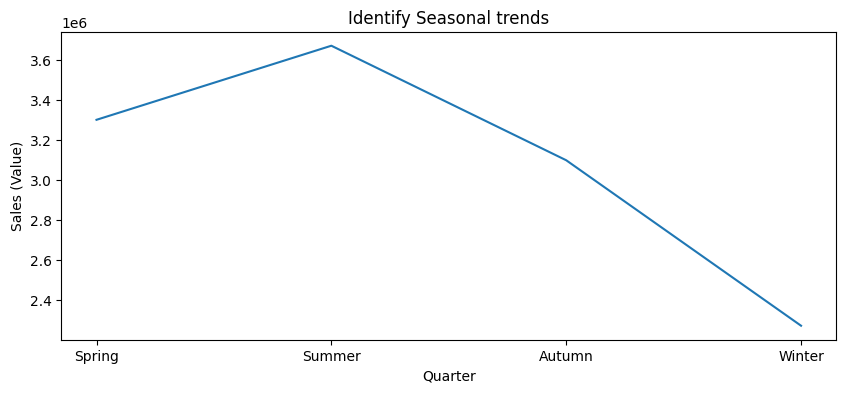

In [18]:
# Plot Identify Seasonal trends pattern
plt.figure(figsize=(10, 4))
quarters=[1,2,3,4]
plt.plot(quaterly_sales.index,quaterly_sales.values)
plt.title("Identify Seasonal trends")
plt.xlabel("Quarter")
plt.ylabel("Sales (Value)")
plt.xticks(quarters,["Spring","Summer","Autumn","Winter"])
plt.show()

In [19]:
# Study delivery time patterns
#  Calculate delivery time metrics
sales_data['order_delivered_customer_date'] = pd.to_datetime(sales_data['order_delivered_customer_date'])
sales_data['order_approved_at'] = pd.to_datetime(sales_data['order_approved_at'])
sales_data['order_delivered_carrier_date'] = pd.to_datetime(sales_data['order_delivered_carrier_date'])

# Calculate delivery time metrics
sales_data['order_purchase_timestamp'] = pd.to_datetime(sales_data['order_purchase_timestamp'])

sales_data['total_delivery_time'] = (sales_data['order_delivered_customer_date'] - sales_data['order_approved_at']).dt.days
sales_data['carrier_delivery_time'] = (sales_data['order_delivered_carrier_date'] - sales_data['order_approved_at']).dt.days
sales_data['customer_delivery_time'] = (sales_data['order_delivered_customer_date'] - sales_data['order_delivered_carrier_date']).dt.days

# Filter invalid delivery times (e.g., negative or null values)
sales_data = sales_data[sales_data['total_delivery_time'] >= 0]

<ipython-input-19-6359d32ef596>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales_data['order_delivered_customer_date'] = pd.to_datetime(sales_data['order_delivered_customer_date'])
<ipython-input-19-6359d32ef596>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales_data['order_approved_at'] = pd.to_datetime(sales_data['order_approved_at'])
<ipython-input-19-6359d32ef596>:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales_data['order_delivered_carrier_date'] = pd.to_datetime(sales_data['order_delivered_carrier_date'])


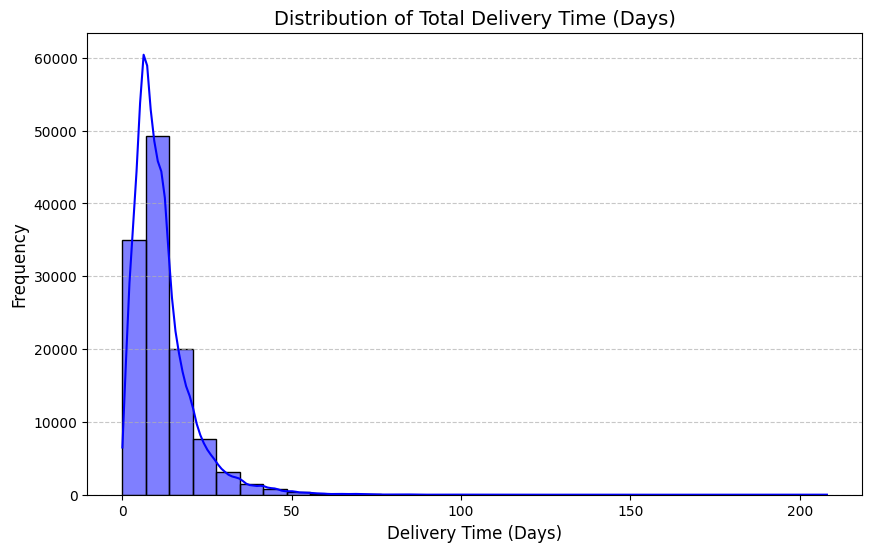

In [20]:
# Plot the distribution of total delivery time
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['total_delivery_time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Delivery Time (Days)', fontsize=14)
plt.xlabel('Delivery Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
#  Examine payment patterns over time
# Convert timestamp to datetime
sales_data['order_purchase_timestamp'] = pd.to_datetime(sales_data['order_purchase_timestamp'])

# Extract year, month, and day for analysis
sales_data['purchase_year_month'] = sales_data['order_purchase_timestamp'].dt.to_period('M')



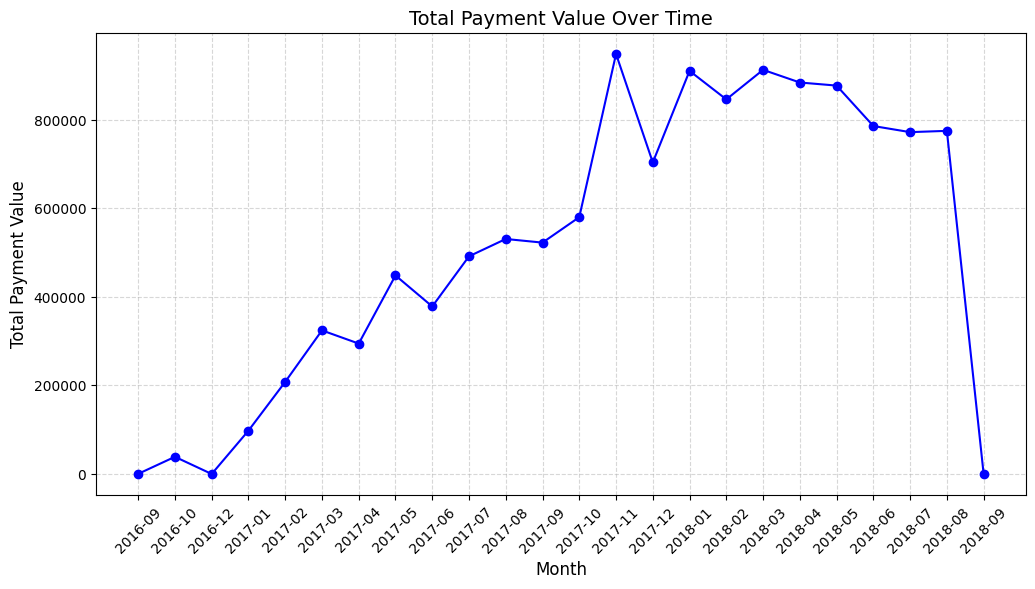

In [22]:
# Group by month and calculate total payment value and transaction count
monthly_payments = sales_data.groupby('purchase_year_month').agg(
    total_payment=('payment_value', 'sum'),
    transaction_count=('payment_value', 'count')
).reset_index()

# Plot total payment value over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_payments['purchase_year_month'].astype(str), monthly_payments['total_payment'], marker='o', color='blue')
plt.title('Total Payment Value Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Payment Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.5)
plt.show()


In [23]:
# merge dataset customers and geolocation
geolocation=geolocation.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'})
customers_geolocation=pd.merge(customers,geolocation,on='customer_zip_code_prefix',how='left')
print(customers_geolocation.shape)
print(customers_geolocation.head())
print(customers_geolocation.isnull().sum())
# dropping null values3
customers_geolocation=customers_geolocation.dropna()
print(customers_geolocation.isnull().sum())
print(customers_geolocation.shape)


(15083733, 9)
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
2  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
3  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
4  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   

   customer_zip_code_prefix customer_city customer_state  geolocation_lat  \
0                     14409        franca             SP       -20.509897   
1                     14409        franca             SP       -20.497396   
2                     14409        franca             SP       -20.510459   
3                     14409        franca             SP       -20.480940   
4                     14409        franca             SP       -20.515413   

   geolocation_lng geolocation_city geolocation_state  
0       -47.397866          

customer_city
rio de janeiro    1913966
sao paulo         1372374
belo horizonte     737548
niteroi            452857
curitiba           255744
santos             238952
porto alegre       228824
uberlandia         191192
campinas           170318
santo andre        167082
Name: count, dtype: int64


<ipython-input-24-22aaf77561aa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')


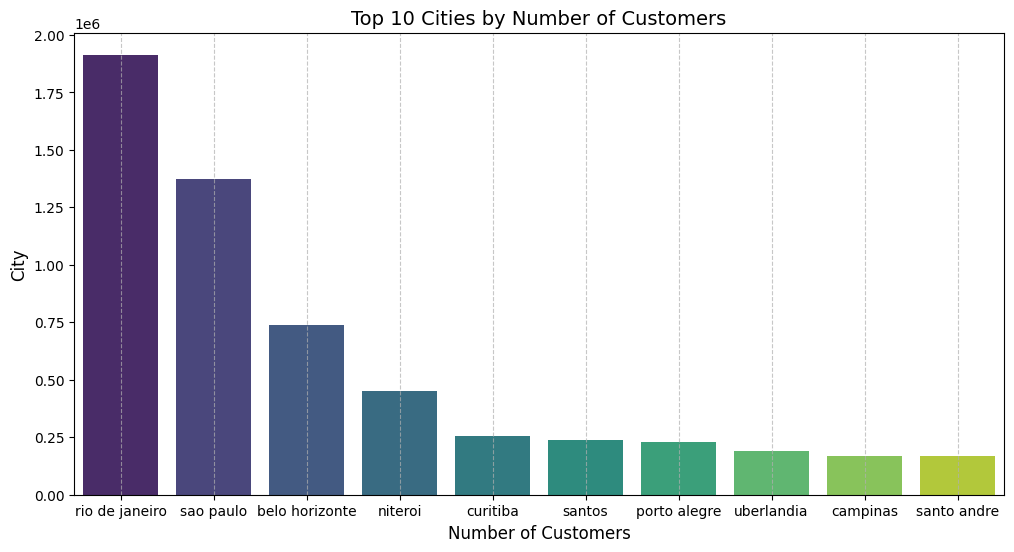

In [24]:
#  Analyze customer geographic distribution

city_counts = customers_geolocation['customer_city'].value_counts().head(10)
print(city_counts)
# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Top 10 Cities by Number of Customers', fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

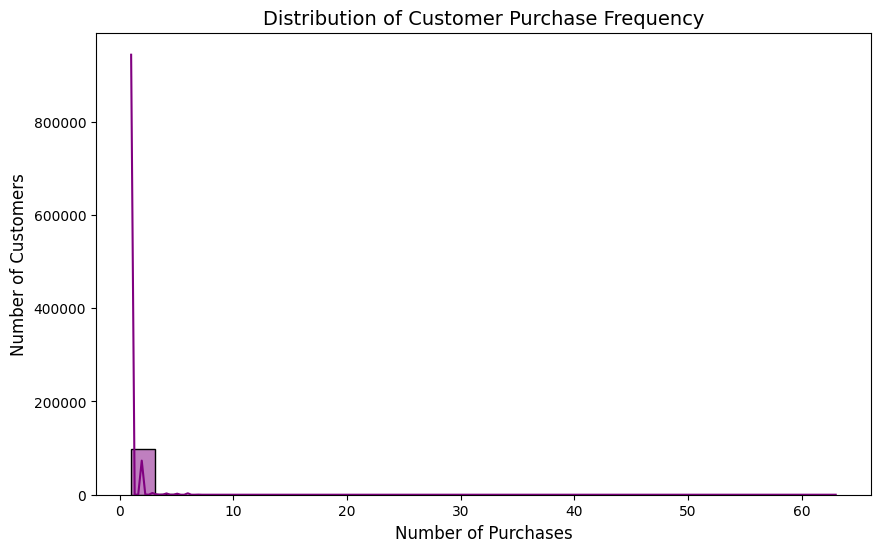

In [25]:
# Studypurchase frequency patterns
# Group by customer ID and count purchases
customer_purchases = sales_data.groupby('customer_id')['order_purchase_timestamp'].count()

# Plot distribution of purchase frequency
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchases, bins=30, color='purple', kde=True)
plt.title('Distribution of Customer Purchase Frequency', fontsize=14)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()


                            customer_id  total_spent
97146  fc3d1daec319d62d49bfb5e1f83123e9      4118.31
73410  bdced1e75dafe66bd70dc84af644bca7      3678.48
22900  3b54b5978e9ace64a63f90d176ffb158      3630.24
30995  50920f8cd0681fd86ebe93670c8fe52e      2951.83
61145  9eb3d566e87289dcb0acf28e1407c839      2928.24
7769   14532b4dffa2bf13edc019346063c2fb      2680.00
97475  fd2ae8c714a773f85ef1b53fbebeda1f      2440.32
91065  ebfafa93320c769d9b60740fbc5cad2f      2288.96
18261  2f6d72365267ce6048d9bbc1a9bd977e      2208.78
22555  3a6be57061ebc68cc00b74186fe7ce5c      2150.61


<ipython-input-26-1575536f882a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_customers['customer_id'], y=top_10_customers['total_spent'], palette='coolwarm')


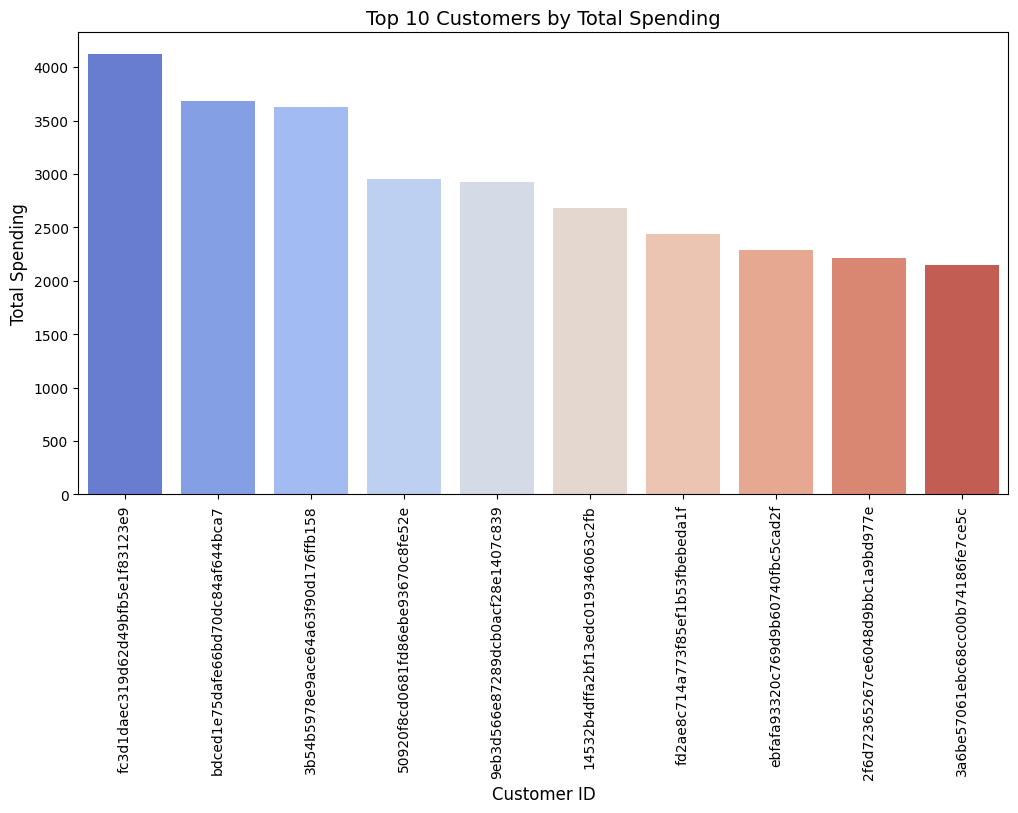

In [26]:
#  Examine customer spending habits
# Group by customer_id and calculate total spending
customer_spending = sales_data.groupby('customer_id')['payment_value'].sum().reset_index()
customer_spending.rename(columns={'payment_value': 'total_spent'}, inplace=True)

# Sort customers by total spending
customer_spending = customer_spending.sort_values(by='total_spent', ascending=False)

# Plot top 10 spending customers
top_10_customers = customer_spending.head(10)
print(top_10_customers)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_customers['customer_id'], y=top_10_customers['total_spent'], palette='coolwarm')
plt.title('Top 10 Customers by Total Spending', fontsize=14)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.xticks(rotation=90)
plt.show()


In [27]:
# Analyze the impact of reviews on future purchases

# Convert relevant date columns to datetime format
date_cols = ['order_purchase_timestamp', 'review_creation_date']
for col in date_cols:
    sales_data[col] = pd.to_datetime(sales_data[col])

# Sort data by customer and order date
sales_data = sales_data.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])

# Preview the data
print(sales_data[['customer_unique_id', 'review_score', 'order_purchase_timestamp']].head())

# Group by customer and calculate the next order date
sales_data['future_purchase'] = sales_data.groupby('customer_unique_id')['order_purchase_timestamp'].shift(-1)

# Check if the next purchase occurred after the review date
sales_data['has_future_purchase'] = (sales_data['future_purchase'] > sales_data['review_creation_date']).astype(int)

# Aggregate results for each review score
review_impact = sales_data.groupby('review_score')['has_future_purchase'].mean().reset_index()

# Rename columns for clarity
review_impact.columns = ['review_score', 'future_purchase_rate']

print("Impact of review scores on future purchases:")
print(review_impact)


                     customer_unique_id  review_score order_purchase_timestamp
76543  0000366f3b9a7992bf8c76cfdf3221e2           5.0      2018-05-10 10:56:00
29390  0000b849f77a49e4a4ce2b2a4ca5be3f           4.0      2018-05-07 11:11:00
48880  0000f46a3911fa3c0805444483337064           3.0      2017-03-10 21:05:00
68242  0000f6ccb0745a6a4b88665a16c9f078           4.0      2017-10-12 20:29:00
97125  0004aac84e0df4da2b147fca70cf8255           5.0      2017-11-14 19:45:00
Impact of review scores on future purchases:
   review_score  future_purchase_rate
0           1.0              0.010727
1           2.0              0.012267
2           3.0              0.014957
3           4.0              0.015429
4           5.0              0.019196


<ipython-input-28-b1cab998042e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=review_impact, x='review_score', y='future_purchase_rate', palette='coolwarm')


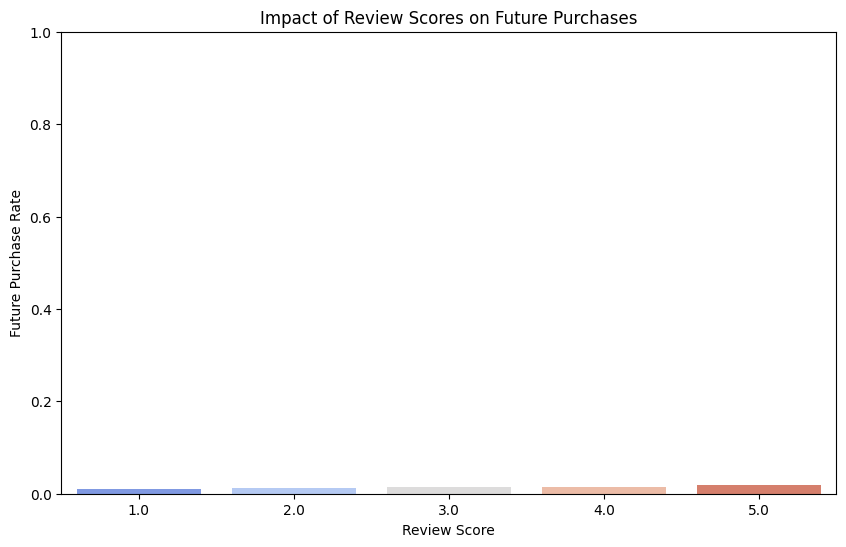

In [28]:
# Plot the impact of review scores on future purchases
plt.figure(figsize=(10, 6))
sns.barplot(data=review_impact, x='review_score', y='future_purchase_rate', palette='coolwarm')

plt.title("Impact of Review Scores on Future Purchases")
plt.xlabel("Review Score")
plt.ylabel("Future Purchase Rate")
plt.ylim(0, 1)
plt.show()


<ipython-input-29-69f111b67b79>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_score, x='review_score', y='future_revenue', palette='viridis')


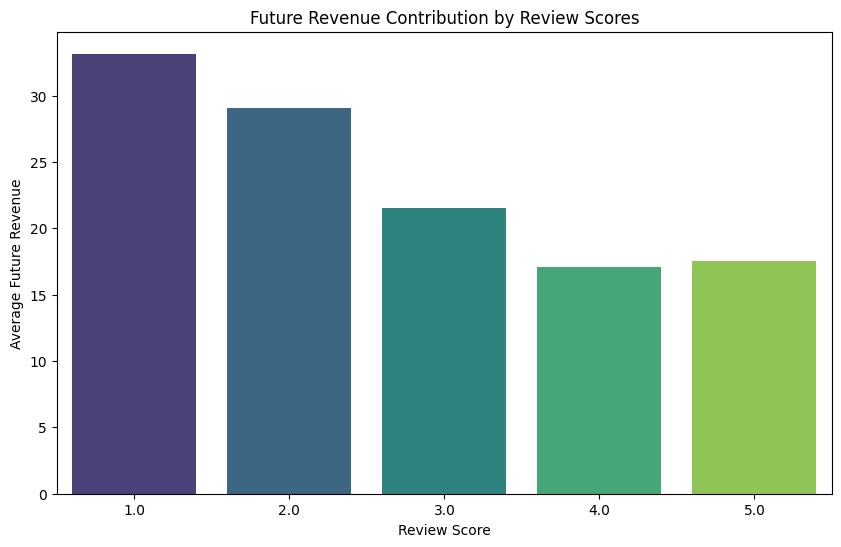

In [29]:
# Add future revenue for customers who made repeat purchases
sales_data['future_revenue'] = sales_data.groupby('customer_unique_id')['payment_value'].shift(-1)
sales_data['future_revenue'] = sales_data['future_revenue'].fillna(0)

# Group data by review scores and compute average future revenue
revenue_by_score = sales_data.groupby('review_score')['future_revenue'].mean().reset_index()

# Plot future revenue contribution
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_score, x='review_score', y='future_revenue', palette='viridis')

plt.title("Future Revenue Contribution by Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Average Future Revenue")
plt.show()


In [30]:
# Identify top-selling products and categories
# Group by product_id and calculate sales count and total revenue
top_products = sales_data.groupby('product_id').agg(
    total_sales=('order_item_id', 'count'),
    total_revenue=('price', 'sum')
).reset_index()

# Sort by total_sales to get the top-selling products
top_products = top_products.sort_values(by='total_sales', ascending=False).head(10)

print("Top 10 Selling Products:")
print(top_products)


Top 10 Selling Products:
                             product_id  total_sales  total_revenue
22100  aca2eb7d00ea1a7b8ebd4e68314663af          536       38248.20
19731  99a4788cb24856965c36a24e339b6058          528       46575.66
8608   422879e10f46682990de24d770e7f83d          508       27851.62
7360   389d119b48cf3043d311335e499d9c6b          406       22181.19
7076   368c6c730842d78016ad823897a372db          398       21601.10
10832  53759a2ecddad2bb87a079a1f1519f73          391       21390.70
27027  d1c427060a0f73f6b889a5c7c61f2ac4          357       49141.40
10859  53b36df67ebb7c41585e8d54d6772e08          327       38158.21
2793   154e7e31ebfa092203795c972e5804a6          295        6645.05
8046   3dd2a17168ec895c781a9191c1e95ad7          278       41682.20


<ipython-input-31-87f7607bd360>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='total_sales', y='product_id', palette='viridis')


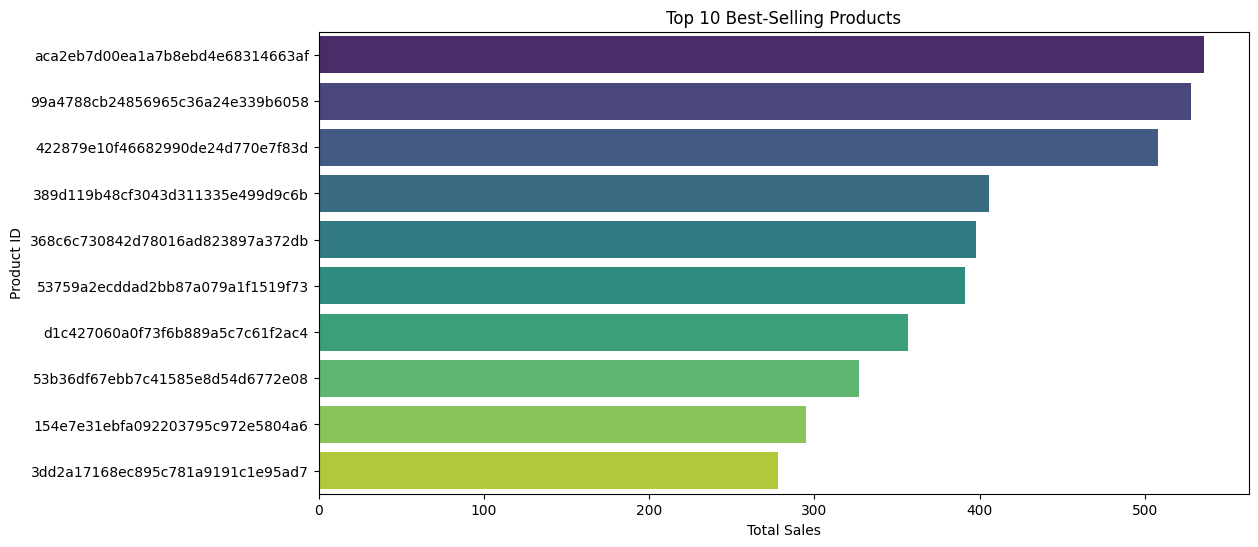

In [31]:
# Plot top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='total_sales', y='product_id', palette='viridis')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product ID")
plt.show()


In [32]:
# Group by product_category_name and calculate sales count and total revenue
top_categories = sales_data.groupby('product_category_name').agg(
    total_sales=('order_item_id', 'count'),
    total_revenue=('price', 'sum')
).reset_index()

# Sort by total_sales to get the top-selling categories
top_categories = top_categories.sort_values(by='total_sales', ascending=False).head(10)

print("Top 10 Selling Categories:")
print(top_categories)


Top 10 Selling Categories:
     product_category_name  total_sales  total_revenue
13         cama_mesa_banho        11980     1106520.33
11            beleza_saude        10000     1291901.73
32           esporte_lazer         8991     1025034.08
54        moveis_decoracao         8811      768064.67
44  informatica_acessorios         8142      946499.10
72   utilidades_domesticas         7365      664024.24
66      relogios_presentes         6182     1231449.44
70               telefonia         4714      335850.40
40      ferramentas_jardim         4584      515291.35
8               automotivo         4384      606287.35


<ipython-input-33-f08a82e9ab58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='total_sales', y='product_category_name', palette='coolwarm')


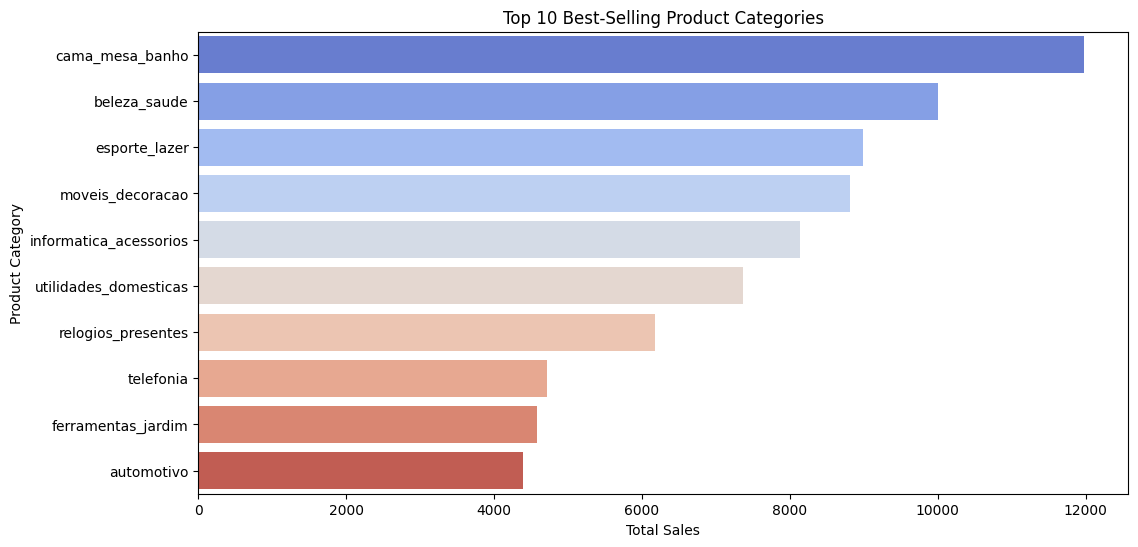

In [33]:
# Plot top-selling categories
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, x='total_sales', y='product_category_name', palette='coolwarm')
plt.title("Top 10 Best-Selling Product Categories")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.show()


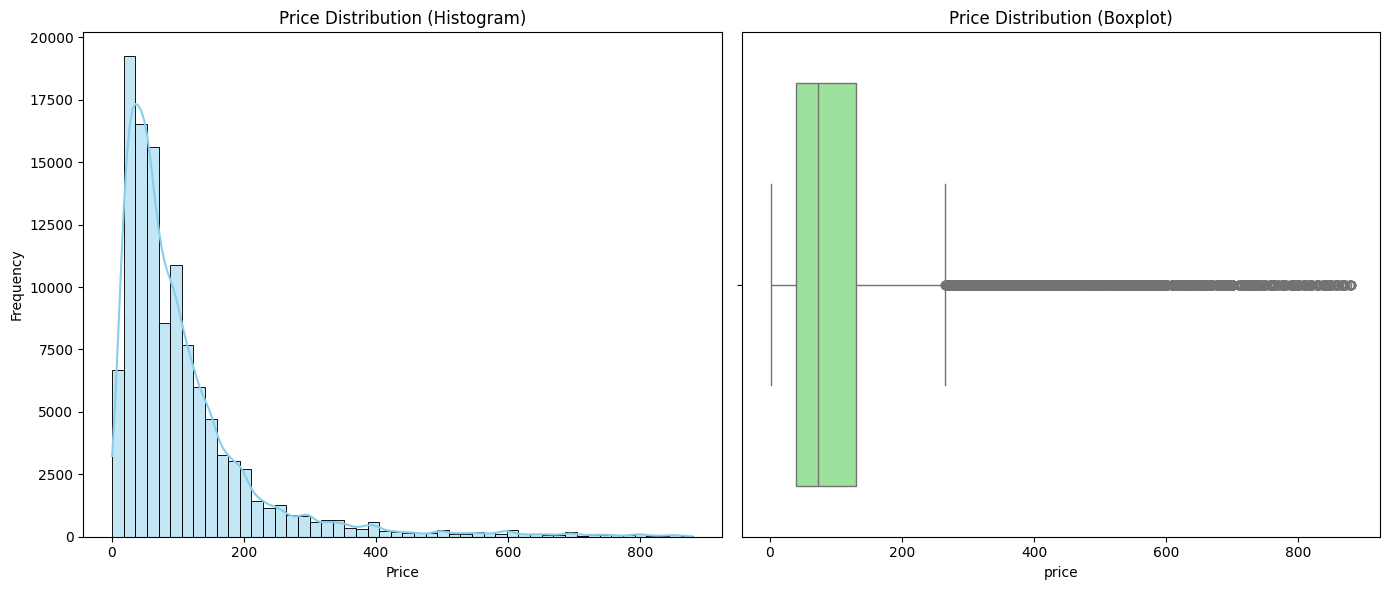

In [34]:
#  Analyze price distributions
# Filter out outliers for better visualization (optional)
filtered_prices = sales_data['price'][sales_data['price'] <= sales_data['price'].quantile(0.99)]

# Plot the price distribution
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(filtered_prices, bins=50, kde=True, color='skyblue')
plt.title("Price Distribution (Histogram)")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_prices, color='lightgreen')
plt.title("Price Distribution (Boxplot)")

plt.tight_layout()
plt.show()




<ipython-input-35-7bec1a08a5ae>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_product_count.head(10).index, y=category_product_count.head(10).values, palette="coolwarm")


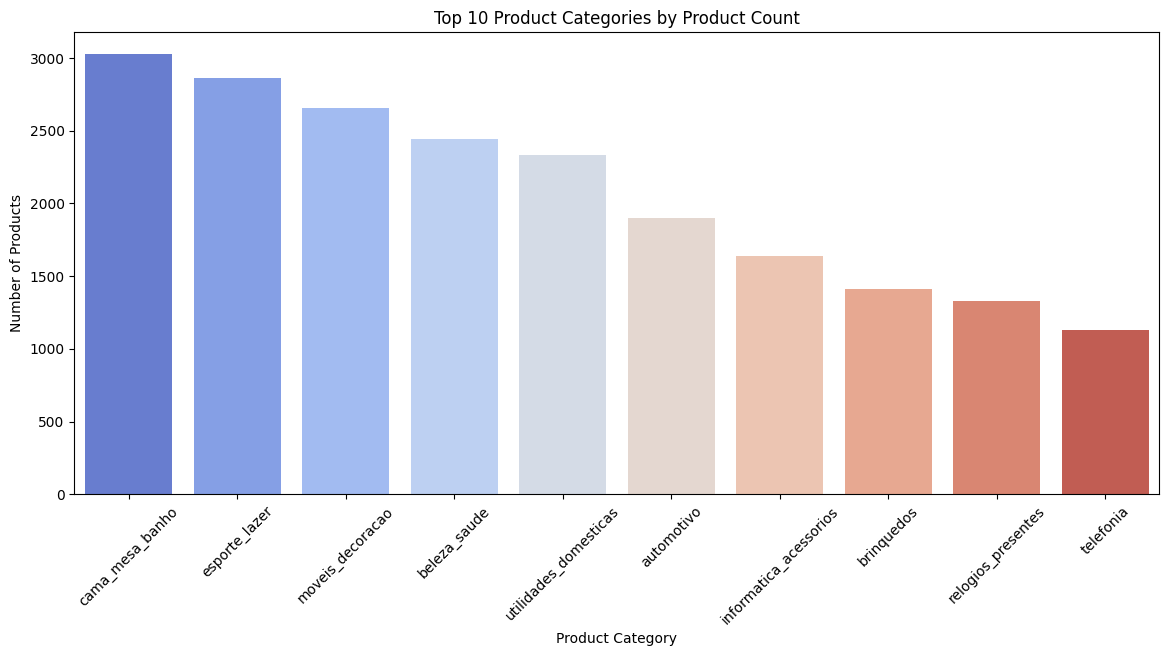

In [35]:
# Study product category relationships
# Count the number of products per category
category_product_count = sales_data.groupby('product_category_name')['product_id'].nunique().sort_values(ascending=False)

# Plot the top 10 product categories by product count
plt.figure(figsize=(14, 6))
sns.barplot(x=category_product_count.head(10).index, y=category_product_count.head(10).values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories by Product Count")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.show()


In [36]:
# Examine product return rates
# Flag returned items: 1 if returned/canceled, 0 otherwise
sales_data['is_returned'] = sales_data['order_status'].isin(['returned', 'canceled']).astype(int)

# Group by product_id to calculate total items sold and total items returned
product_returns = sales_data.groupby('product_id').agg(
    total_items_sold=('order_item_id', 'count'),      # Total items sold
    total_items_returned=('is_returned', 'sum')       # Total items returned
).reset_index()

# Calculate return rate for each product
product_returns['return_rate_percent'] = (product_returns['total_items_returned'] /
                                          product_returns['total_items_sold']) * 100

# Sort products by return rate in descending order
product_returns = product_returns.sort_values(by='return_rate_percent', ascending=False)

# Display the top 10 products with the highest return rates
print("Top 10 Products with Highest Return Rates:")
print(product_returns.head(10))


Top 10 Products with Highest Return Rates:
                             product_id  total_items_sold  \
22680  b0c7a71c8620bd389e240f63a507dc50                 1   
11959  5c3eaf54e8ee5d5378765ff16df7640b                 6   
22199  ad30079acfcea22be08f603414dbc0fe                 1   
4776   241a1ffc9cf969b27de6e72301020268                 1   
32402  fbe6d5795a52b760e25a4e9677a2e217                 1   
32405  fbecfbe44e34c5291e5499870cd5db2e                 1   
25145  c3a52053718435a35e070b991ff546ec                 5   
12846  6371d60c329c7474f4190b077378660e                 1   
31116  f1aa9d01a0ddad2937f722cb61abc03f                 1   
8882   44483ca1c9223756ee0ee71c0676d3a3                 1   

       total_items_returned  return_rate_percent  
22680                     1                100.0  
11959                     6                100.0  
22199                     1                100.0  
4776                      1                100.0  
32402                     1   

<ipython-input-37-fb8b13cbc49a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='return_rate_percent', data=product_returns.head(10), palette="Reds_d")


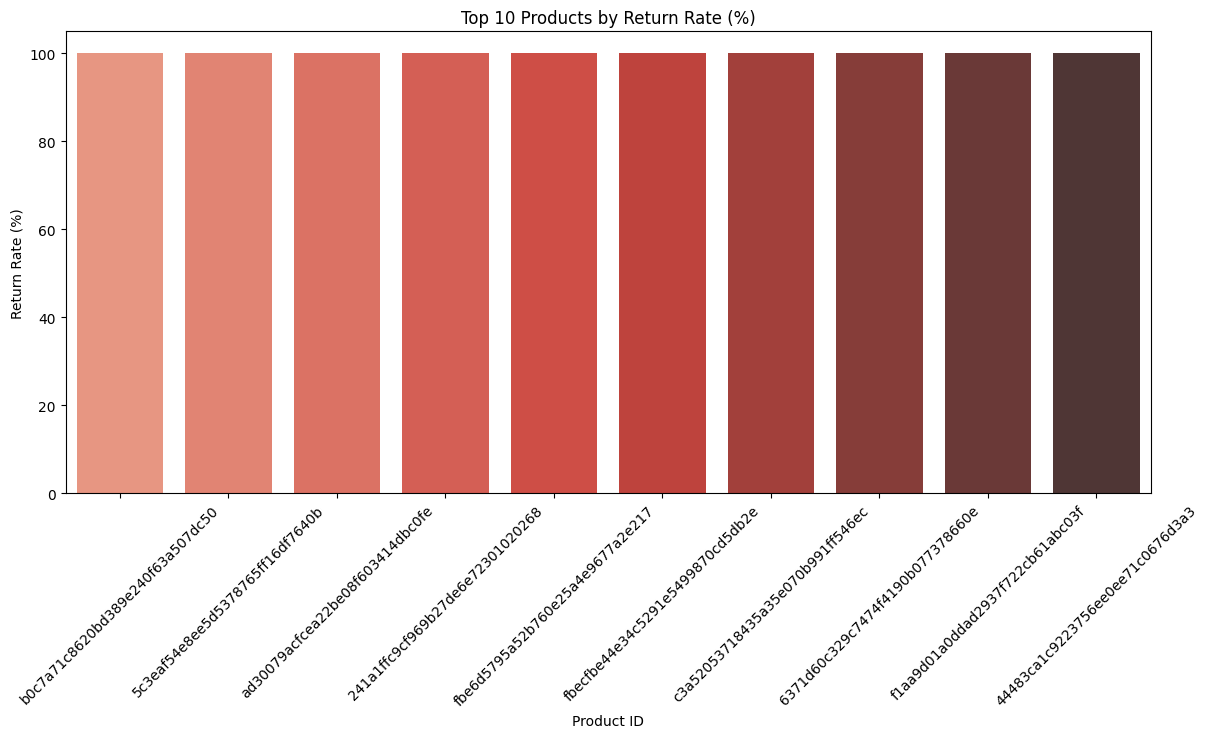

In [37]:
# Plot the top 10 products with highest return rates
plt.figure(figsize=(14, 6))
sns.barplot(x='product_id', y='return_rate_percent', data=product_returns.head(10), palette="Reds_d")
plt.xticks(rotation=45)
plt.title("Top 10 Products by Return Rate (%)")
plt.xlabel("Product ID")
plt.ylabel("Return Rate (%)")
plt.show()


In [38]:
# Group by product_category_name to calculate total items sold and returned
category_returns = sales_data.groupby('product_category_name').agg(
    total_items_sold=('order_item_id', 'count'),
    total_items_returned=('is_returned', 'sum')
).reset_index()

# Calculate return rate for each category
category_returns['return_rate_percent'] = (category_returns['total_items_returned'] /
                                           category_returns['total_items_sold']) * 100

# Sort categories by return rate in descending order
category_returns = category_returns.sort_values(by='return_rate_percent', ascending=False)

# Display the top 10 categories with the highest return rates
print("Top 10 Categories with Highest Return Rates:")
print(category_returns.head(10))


Top 10 Categories with Highest Return Rates:
                            product_category_name  total_items_sold  \
60                                       pc_gamer                10   
65  portateis_cozinha_e_preparadores_de_alimentos                15   
27                                   dvds_blu_ray                71   
42                                fraldas_higiene                39   
25               construcao_ferramentas_seguranca               197   
24                  construcao_ferramentas_jardim               247   
45                          instrumentos_musicais               711   
48                         livros_interesse_geral               564   
31                                eletroportateis               697   
29                             eletrodomesticos_2               267   

    total_items_returned  return_rate_percent  
60                     1            10.000000  
65                     1             6.666667  
27                     3     

<ipython-input-39-7a36d381edba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name', y='return_rate_percent', data=category_returns.head(10), palette='coolwarm')


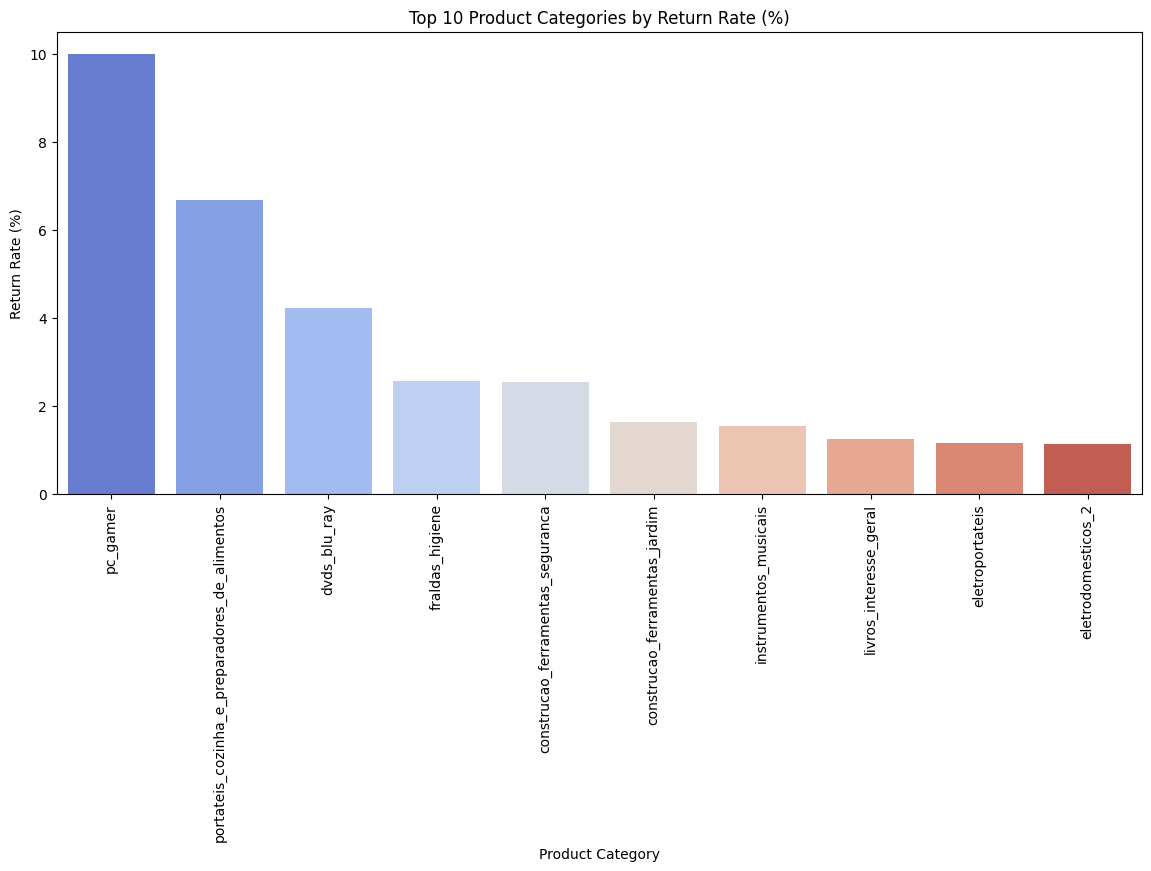

In [39]:
# Plot the top 10 product categories with the highest return rates
plt.figure(figsize=(14, 6))
sns.barplot(x='product_category_name', y='return_rate_percent', data=category_returns.head(10), palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Top 10 Product Categories by Return Rate (%)")
plt.xlabel("Product Category")
plt.ylabel("Return Rate (%)")
plt.show()


In [40]:
print(sales_data.info())

# copy the sales data to df
df = sales_data.copy()

# Assuming df is your dataset
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Create the target variable
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

<class 'pandas.core.frame.DataFrame'>
Index: 118036 entries, 76543 to 100064
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118036 non-null  object        
 1   customer_unique_id             118036 non-null  object        
 2   customer_zip_code_prefix       118036 non-null  int64         
 3   customer_city                  118036 non-null  object        
 4   customer_state                 118036 non-null  object        
 5   order_id                       118036 non-null  object        
 6   order_item_id                  118036 non-null  float64       
 7   product_id                     118036 non-null  object        
 8   seller_id                      118036 non-null  object        
 9   shipping_limit_date            118036 non-null  object        
 10  price                          118036 non-null  float64       
 11  f

In [41]:
# Select features
features = ['freight_value', 'product_weight_g', 'product_height_cm', 'product_width_cm', 'product_length_cm', 'price']

# Drop rows with missing target variable or features
df = df.dropna(subset=['delivery_time'] + features)
print(df)

                             customer_id                customer_unique_id  \
76543   fadbb3709178fc513abc1b2670aa1ad2  0000366f3b9a7992bf8c76cfdf3221e2   
29390   4cb282e167ae9234755102258dd52ee8  0000b849f77a49e4a4ce2b2a4ca5be3f   
48880   9b3932a6253894a02c1df9d19004239f  0000f46a3911fa3c0805444483337064   
68242   914991f0c02ef0843c0e7010c819d642  0000f6ccb0745a6a4b88665a16c9f078   
97125   47227568b10f5f58a524a75507e6992c  0004aac84e0df4da2b147fca70cf8255   
...                                  ...                               ...   
106678  74be082247cd677a147d83ee670e9d53  fffcf5a5ff07b0908bd4e2dbc735a684   
11737   0ecf8e0a08148af0bf313184f167670a  fffea47cd6d3cc0a88bd621562a9d061   
82492   27f584b0f1dc4e610065c240f68b6be0  ffff371b4d645b6ecea244b27531430a   
113526  832a3b0254347d409512ae92eaf154a6  ffff5962728ec6157033ef9805bacc48   
100064  70bc4d9cf2bbeea3f7b09798370f5884  ffffd2657e2aad2907e67c3e9daecbeb   

        customer_zip_code_prefix       customer_city customer_s

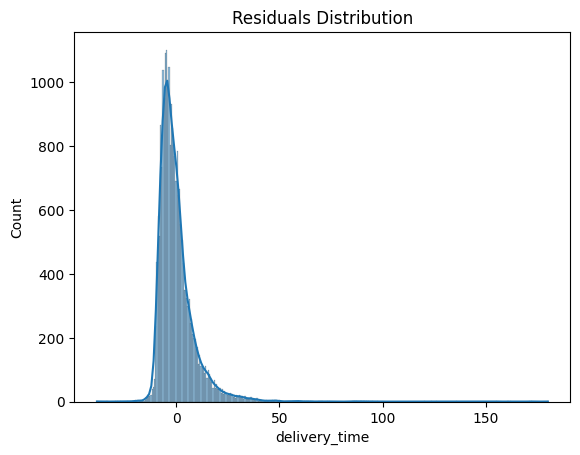

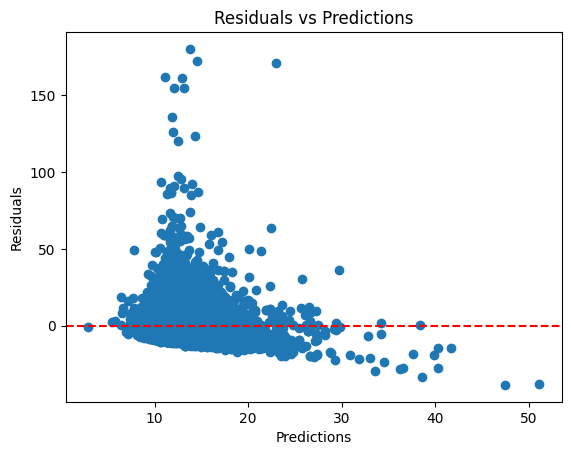

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[features]
y = df['delivery_time']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


# Residuals
residuals = y_test - y_pred_test

# Plot residuals
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Residuals vs Predictions
plt.scatter(y_pred_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predictions")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()




In [45]:
import numpy as np
# Metrics

r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(feature_importance.sort_values(by='Coefficient', ascending=False))


# Validate on test set
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Test Set R²: {r2_test}")

R²: 0.05577898583399177
RMSE: 9.227191218521735
MAE: 6.018063267420169
             Feature  Coefficient
0      freight_value     0.148450
4  product_length_cm     0.019333
2  product_height_cm     0.010637
1   product_weight_g    -0.000185
5              price    -0.001204
3   product_width_cm    -0.020043
Test Set R²: 0.05577898583399177
